In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

## Perceptron

In [2]:
class Perceptron:
    # Inicialização do perceptron
    def __init__(self, eta=0.1, epochs=10):
        self.eta = eta
        self.epochs = epochs
        self.W = np.random.uniform(0, 1, size = (1 + X.shape[1]))  # Inicialização da matriz de pesos

    # Treina o perceptron com os inputs e respectivos rótulos
    def fit(self, X, y):
        self.errors = []

        for i in range(self.epochs):  # iteração pelas épocas
            errors = 0
            for xi, target in zip(X,y):
                y_pred = self.predict(xi, target)  # Valor retornado pela função de ativação de passo
                delta = self.eta * (target - y_pred)
                self.W[1:] += delta * xi  # Parâmetros dos pesos
                self.W[0] += delta  # Bias
                errors += int(delta != 0.0)
            print(f"Época: {i} | Acurácia: {(len(y) - errors) / len(y)}")
            self.errors.append(errors)
        self.coef_ang = -self.W[1] / self.W[2]
        self.coef_lin = -self.W[0] / self.W[2]

    # Predict pela função de ativação de passo
    def predict(self, xi, target):
        return 1 if np.dot(self.W[1:], xi) + self.W[0] >= 0 else 0

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

X = df.iloc[0:100, [0, 2]].values

X_label = df.iloc[0:100, 4].values
X_label = np.where(X_label == 'Iris-setosa', 1, 0)

In [4]:
prr = Perceptron(0.01, 10)
prr.fit(X, X_label)

Época: 0 | Acurácia: 0.9
Época: 1 | Acurácia: 1.0
Época: 2 | Acurácia: 1.0
Época: 3 | Acurácia: 1.0
Época: 4 | Acurácia: 1.0
Época: 5 | Acurácia: 1.0
Época: 6 | Acurácia: 1.0
Época: 7 | Acurácia: 1.0
Época: 8 | Acurácia: 1.0
Época: 9 | Acurácia: 1.0


In [5]:
dom = np.linspace(2, 9, 100)
img = prr.coef_lin + dom * prr.coef_ang

print(prr.coef_ang)
print(prr.coef_lin)

0.5495539386185223
-0.10510461504313419


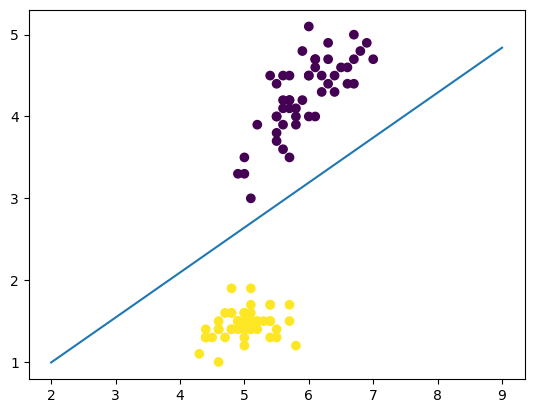

In [6]:
plt.scatter(X[:,0], X[:,1], c=X_label)
plt.plot(dom, img)

## Adaline

In [7]:
class Adaline:
    # Inicialização do perceptron
    def __init__(self, eta=0.1, epochs=10):
        self.eta = eta
        self.epochs = epochs
        self.W = np.random.uniform(0, 1, size = (1 + X.shape[1]))  # Inicialização da matriz de pesos

    # Treina o perceptron com os inputs e respectivos rótulos
    def fit(self, X, y):
        self.errors = []
        predicted = []

        for i in range(self.epochs):  # Roda por 'epochs' épocas
            for xi, target in zip(X,y):
                y_pred = self.predict(xi)  # Valor retornado pelo produto input * W
                delta = self.eta * (target - y_pred)
                self.W[1:] += delta * xi  # Parâmetros dos pesos
                self.W[0] += delta[0]  # Bias
                predicted.append(y_pred)
            R2 = r2_score(y, predicted)  # Avaliação do modelo
            print(f"Época: {i} | R2: {R2}")
            predicted.clear()
        self.coef_ang = self.W[1]
        self.coef_lin = self.W[0]

    # Predict pela função de ativação de passo
    def predict(self, xi):
        return self.W[1] * xi + self.W[0]

In [14]:
df = pd.read_csv("data/possum.csv")
print(df.shape)
df.head()

(104, 14)


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


Normalização dos dados

In [10]:
x = np.array(df.iloc[:, 5])
y = np.array(df.iloc[:, 6])

scaler = MinMaxScaler()
x = scaler.fit_transform(x.reshape(-1, 1))
y = scaler.fit_transform(y.reshape(-1, 1))

In [11]:
adl = Adaline(.1, 10)
adl.fit(x,y)

Época: 0 | R2: 0.19681115455174625
Época: 1 | R2: 0.3474925879554742
Época: 2 | R2: 0.3865073427395115
Época: 3 | R2: 0.41258502952834397
Época: 4 | R2: 0.43012436957009104
Época: 5 | R2: 0.4420059461717072
Época: 6 | R2: 0.4501207041010842
Época: 7 | R2: 0.45571357041537497
Época: 8 | R2: 0.4596070392070125
Época: 9 | R2: 0.46234679540223544


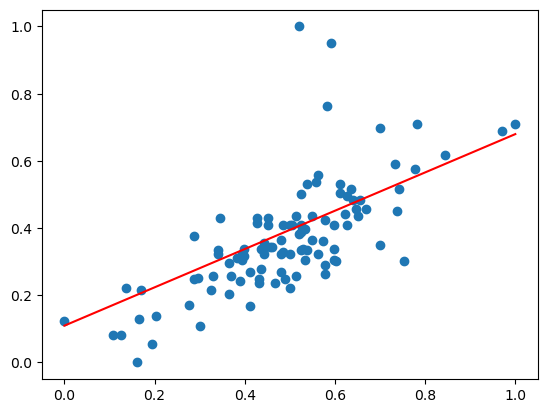

In [13]:
adl_dom = np.linspace(0, 1, 100)
adl_img = adl.coef_lin + adl_dom * adl.coef_ang

plt.scatter(x, y)
plt.plot(adl_dom, adl_img, color='r')